In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#sys.path.append(os.path.join('/Users/mosesadebayo/desktop/ats/repos/amanzi/src/physics/ats/tools/meshing/meshing_ats'))
try:
    import meshing_ats
except ImportError:
    sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing','meshing_ats'))
    import meshing_ats

In [13]:
import pandas as pd
p1=pd.read_csv('BSL_profile.txt', delimiter='\t')

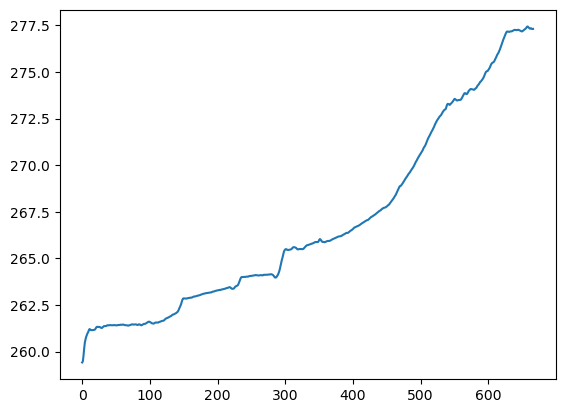

In [14]:
plt.plot(p1['Graphic Profile 1'])

In [30]:
new_x=np.hstack((np.arange(0,101, 0.5),np.arange(102,305, 5)))
new_x=np.arange(0,100, 0.5)
value=100
incr=0.5
while value<300:
    value+=incr
    incr+=0.5
    new_x=np.hstack((new_x,value))
new_y = np.interp(new_x, p1.X.values, p1['Graphic Profile 1'].values)

In [16]:
np.interp([1,2.7,5.4,9.1], p1.X.values, p1['Graphic Profile 1'].values)+[0.185,0.545,0.525,0.525]

array([259.59683748, 260.22213654, 261.07872784, 261.51525201])

In [15]:
259.67713654+0.545

260.22213654

In [31]:
new_x

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [32]:
m2 = meshing_ats.Mesh2D.from_Transect(new_x,new_y,1)

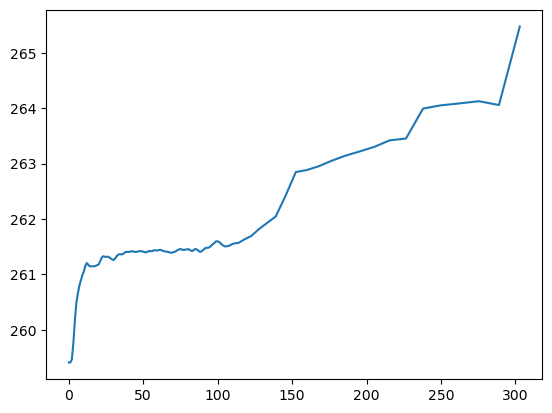

In [33]:
plt.plot(new_x,new_y)

ValueError: x and y must have same first dimension, but have shapes (228,) and (142,)

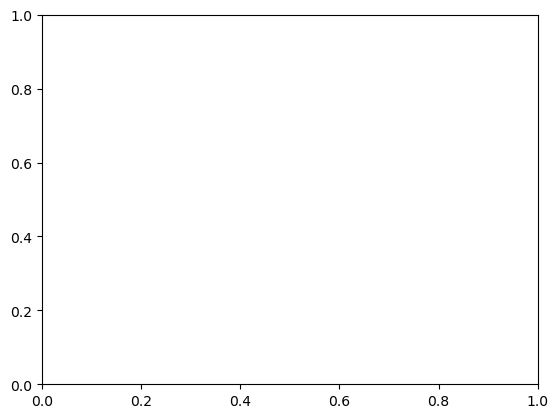

In [34]:
def organic_thickness1(x):
    """This function is the thickness of the layer we want to vary as a function of distance down the slope"""
    if x[0] <= 15:
        thickness = x[2]-257
    else:
        thickness = 0
    return thickness
def organic_thickness2(x):
    """This function is the thickness of the layer we want to vary as a function of distance down the slope"""
    if ((15 < x[0]) and (x[0] <= 130)):
        thickness = x[2]-257
    elif ((130 < x[0]) and (x[0] <= 337)):
        thickness = 4
    else:
        thickness = 0
    return thickness
def organic_thickness3(x):
    """This function is the thickness of the layer we want to vary as a function of distance down the slope"""
    if ((337 < x[0]) and (x[0] <= 493)):
        thickness = 4
    else:
        thickness = 0
    return thickness
def organic_thickness4(x):
    """This function is the thickness of the layer we want to vary as a function of distance down the slope"""
    if ((493 < x[0]) and (x[0] <= 547)):
        thickness = 4
    else:
        thickness = 0
    return thickness
def organic_thickness5(x):
    """This function is the thickness of the layer we want to vary as a function of distance down the slope"""
    if x[0] > 547:
        thickness = 4
    else:
        thickness = 0
    return thickness
layer_1 = np.array([organic_thickness1(xx) for xx in m2.coords])
layer_2 = np.array([organic_thickness2(xx) for xx in m2.coords])
layer_3 = np.array([organic_thickness3(xx) for xx in m2.coords])
layer_4 = np.array([organic_thickness4(xx) for xx in m2.coords])
layer_5 = np.array([organic_thickness5(xx) for xx in m2.coords])
plt.plot(new_x, layer_1[0:228]); plt.xlabel('x distance (m)'); plt.ylabel('org. layer thickness (m)');
plt.plot(new_x, layer_2[0:228]); plt.xlabel('x distance (m)'); plt.ylabel('org. layer thickness (m)');
plt.plot(new_x, layer_3[0:228]); plt.xlabel('x distance (m)'); plt.ylabel('org. layer thickness (m)');
plt.plot(new_x, layer_4[0:228]); plt.xlabel('x distance (m)'); plt.ylabel('org. layer thickness (m)');
plt.plot(new_x, layer_5[0:228]); plt.xlabel('x distance (m)'); plt.ylabel('org. layer thickness (m)');

In [35]:
# geometry of the transect extrusion
transect_layer_types = []
transect_layer_data = []
transect_layer_ncells = []

depth = []  # bookkeeping for material IDs
current_depth = 0

# We use the same dz as the above column, but because the material ID will change
# at a given depth in x, we spell it out with 1 cell per transect.
#
# 8 cells @ 0.5cm up to 4m mean thickness of first layer
dz = 0.1
depth.append(current_depth)
for i in range(20):
    transect_layer_types.append('constant')
    transect_layer_data.append(dz)
    transect_layer_ncells.append(1)
    current_depth += dz
    depth.append(current_depth)
#increase slightly for the next 13m
dz = 0.3
while current_depth < 16:
    transect_layer_types.append("constant")
    transect_layer_data.append(dz)
    transect_layer_ncells.append(1)
    current_depth += dz
    dz=dz+0.5
    depth.append(current_depth)

# calculate the cell centroid depth
depth = np.array(depth)
transect_layer_depth = (depth[0:-1] + depth[1:])/2

# allocate 2D matrix for material id, (# surface cells, # layers)
n_layers = len(transect_layer_data)
transect_layer_mat_ids=np.zeros((n_layers, m2.num_cells()), 'i')
for j in range(m2.num_cells()):
    for i in range(n_layers):
        if (transect_layer_depth[i] <= layer_1[j]):
            transect_layer_mat_ids[i,j] = 1000
        elif ((layer_1[j] < transect_layer_depth[i]) and (transect_layer_depth[i] <= layer_2[j])):
            transect_layer_mat_ids[i,j] = 1001
        elif ((layer_2[j] < transect_layer_depth[i]) and (transect_layer_depth[i] <= layer_3[j])):
            transect_layer_mat_ids[i,j] = 1002
        elif ((layer_3[j] < transect_layer_depth[i]) and (transect_layer_depth[i] <= layer_4[j])):
            transect_layer_mat_ids[i,j] = 1003
        elif ((layer_4[j] < transect_layer_depth[i]) and (transect_layer_depth[i] <= layer_5[j])):
            transect_layer_mat_ids[i,j] = 1004
        else:
            transect_layer_mat_ids[i,j] = 100

# print out the layer information for the first column of cells
meshing_ats.summarize_extrusion(transect_layer_types, transect_layer_data, 
                                transect_layer_ncells, transect_layer_mat_ids, 0)





Cell summary:
------------------------------------------------------------
l_id	| c_id	|mat_id	| dz		| z_top
------------------------------------------------------------
 00 	| 00 	| 1000 	|   0.100000 	|   0.000000
 01 	| 01 	| 1000 	|   0.100000 	|   0.100000
 02 	| 02 	| 1000 	|   0.100000 	|   0.200000
 03 	| 03 	| 1000 	|   0.100000 	|   0.300000
 04 	| 04 	| 1000 	|   0.100000 	|   0.400000
 05 	| 05 	| 1000 	|   0.100000 	|   0.500000
 06 	| 06 	| 1000 	|   0.100000 	|   0.600000
 07 	| 07 	| 1000 	|   0.100000 	|   0.700000
 08 	| 08 	| 1000 	|   0.100000 	|   0.800000
 09 	| 09 	| 1000 	|   0.100000 	|   0.900000
 10 	| 10 	| 1000 	|   0.100000 	|   1.000000
 11 	| 11 	| 1000 	|   0.100000 	|   1.100000
 12 	| 12 	| 1000 	|   0.100000 	|   1.200000
 13 	| 13 	| 1000 	|   0.100000 	|   1.300000
 14 	| 14 	| 1000 	|   0.100000 	|   1.400000
 15 	| 15 	| 1000 	|   0.100000 	|   1.500000
 16 	| 16 	| 1000 	|   0.100000 	|   1.600000
 17 	| 17 	| 1000 	|   0.100000 	|   1.700000
 1

In [36]:
# make the mesh, save it as an exodus file
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, transect_layer_types,transect_layer_data, 
                                        transect_layer_ncells, transect_layer_mat_ids)
if os.path.exists('BSL_profile.exo'):
    os.remove('BSL_profile.exo')
m3.write_exodus('BSL_profile.exo')


You are using exodus.py v 1.21.2 (seacas-py3), a python wrapper of some of the exodus library.

Copyright (c) 2013-2023 National Technology &
Engineering Solutions of Sandia, LLC (NTESS).  Under the terms of
Contract DE-NA0003525 with NTESS, the U.S. Government retains certain
rights in this software.

Opening exodus file: BSL_profile.exo
Closing exodus file: BSL_profile.exo


In [40]:
os.system("/Users/mosesadebayo/desktop/ats/amanzi_tpls-install-master-Debug/bin/meshconvert BSL_profile.exo BSL_profile_view.exo")


App to convert unstructured meshes between formats
Contact: Rao Garimella (rao@lanl.gov)

Importing mesh from ExodusII file...Building classification information....Done
Exporting mesh to ExodusII/NemesisI format...Done


0